Udara merupakan sebuah kebutuhan pasti bagi seluru makhluk hidup terutama manusia, dalam udara terdapat banyak kandungan antara baik dan buruk. Baiknya terdapat kandungan oksigen yang sebagaimana menjadikannya peran penting bagi manusia dan makhluk hidup lainnya. Namun, adanya kendaraan bermotor, asap pabrik, serta banyak hal yang membuat udara yang seharusnya mengandung banyak oksigen menjadi tercemar dan berdampak buruk bagi manusia. Adapun analisis disini merupakan sebuah klasifikasi untuk mendeteksi apakah udara di sebuah wilayah dikategorikan baik atau sangat tidak sehat. 

### PERSIAPAN DATA

Data diperoleh dari Jakarta Open Data yang dimana berisikan data dari beberapa lokasi di daerah jakarta dengan kurun waktu 6 bulan dimulai dari bulan januari hingga juni tahun 2020

In [1]:
import pandas as pd

df = pd.read_csv('pencemaran udara jkt.csv')
df

,tanggal,stasiun,pm10,so2,co,o3,no2,max,critical,categori
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32.0,O3,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29.0,O3,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39.0,PM10,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38.0,O3,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35.0,PM10,BAIK
...,...,...,...,...,...,...,...,...,...,...
905,2020-06-26,DKI5 (Kebon Jeruk) Jakarta Barat,71,14,23,97,13,97.0,O3,SEDANG
906,2020-06-27,DKI5 (Kebon Jeruk) Jakarta Barat,55,14,11,64,7,64.0,O3,SEDANG
907,2020-06-28,DKI5 (Kebon Jeruk) Jakarta Barat,58,16,10,71,7,71.0,O3,SEDANG
908,2020-06-29,DKI5 (Kebon Jeruk) Jakarta Barat,56,15,10,90,11,90.0,O3,SEDANG


In [2]:
df = df.drop(['stasiun','critical','tanggal','max'], axis =1)
df

,pm10,so2,co,o3,no2,categori
0,30,20,10,32,9,BAIK
1,27,22,12,29,8,BAIK
2,39,22,14,32,10,BAIK
3,34,22,14,38,10,BAIK
4,35,22,12,31,9,BAIK
...,...,...,...,...,...,...
905,71,14,23,97,13,SEDANG
906,55,14,11,64,7,SEDANG
907,58,16,10,71,7,SEDANG
908,56,15,10,90,11,SEDANG


In [3]:
df.dtypes

pm10        object
so2         object
co          object
o3          object
no2         object
categori    object
dtype: object

In [4]:
import pandas as pd

# Assuming df is your DataFrame

# Replace '---' with NaN in multiple columns
columns_to_replace = ['so2', 'co', 'o3', 'no2','pm10']
df[columns_to_replace] = df[columns_to_replace].replace('---', pd.NA)

# Convert specified columns to numeric
df[columns_to_replace] = df[columns_to_replace].apply(pd.to_numeric, errors='coerce')

# Convert the columns to integers
int_columns = ['pm10','so2', 'co', 'o3', 'no2']
df[int_columns] = df[int_columns].astype(float).astype('Int64')
df.dtypes

pm10         Int64
so2          Int64
co           Int64
o3           Int64
no2          Int64
categori    object
dtype: object

### MISSING VALUE

In [5]:
# Melihat jumlah missing values per kolom
missing_values = df.isnull().sum()

# Menampilkan kolom-kolom yang memiliki missing values
columns_with_missing_values = missing_values[missing_values > 0].index

# Menampilkan DataFrame hanya dengan baris yang memiliki missing values
rows_with_missing_values = df[df[columns_with_missing_values].isnull().any(axis=1)]

# Menampilkan hasil
print("Jumlah missing values per kolom:")
print(missing_values)

print("\nKolom-kolom yang memiliki missing values:")
print(columns_with_missing_values)

print("\nDataFrame hanya dengan baris yang memiliki missing values:")
print(rows_with_missing_values)

Jumlah missing values per kolom:
pm10        35
so2         42
co          18
o3          14
no2         33
categori     0
dtype: int64

Kolom-kolom yang memiliki missing values:
Index(['pm10', 'so2', 'co', 'o3', 'no2'], dtype='object')

DataFrame hanya dengan baris yang memiliki missing values:
     pm10   so2    co    o3   no2        categori
22     41  <NA>    27    19    18            BAIK
23     44  <NA>    24    16    13            BAIK
24     27  <NA>    31    27    12            BAIK
25     44  <NA>    51    49    11          SEDANG
26     25  <NA>    21    39    13            BAIK
..    ...   ...   ...   ...   ...             ...
754    40     9    11    30  <NA>            BAIK
822    47  <NA>    14    45     4            BAIK
833  <NA>     4    17    72     8          SEDANG
835  <NA>     2    24    49     9            BAIK
859  <NA>  <NA>  <NA>  <NA>  <NA>  TIDAK ADA DATA

[107 rows x 6 columns]


In [6]:
# Menampilkan baris yang memiliki nilai "TIDAK ADA DATA" dalam setiap kolom
rows_with_no_data = df[df.eq('TIDAK ADA DATA').any(axis=1)]

# Menampilkan hasil
print("Jumlah baris dengan nilai 'TIDAK ADA DATA' per kolom:")
print(df.eq('TIDAK ADA DATA').sum())

print("\nDataFrame hanya dengan baris yang memiliki nilai 'TIDAK ADA DATA':")
print(rows_with_no_data)

# Menghapus seluruh baris yang memiliki nilai 'TIDAK ADA DATA'
df = df.loc[~df.eq('TIDAK ADA DATA').any(axis=1)]
df

Jumlah baris dengan nilai 'TIDAK ADA DATA' per kolom:
pm10        0
so2         0
co          0
o3          0
no2         0
categori    7
dtype: int64

DataFrame hanya dengan baris yang memiliki nilai 'TIDAK ADA DATA':
     pm10   so2    co    o3   no2        categori
197  <NA>  <NA>  <NA>  <NA>  <NA>  TIDAK ADA DATA
248  <NA>  <NA>  <NA>  <NA>  <NA>  TIDAK ADA DATA
372  <NA>  <NA>  <NA>  <NA>     0  TIDAK ADA DATA
404  <NA>  <NA>  <NA>  <NA>     0  TIDAK ADA DATA
423  <NA>  <NA>  <NA>  <NA>     0  TIDAK ADA DATA
728  <NA>  <NA>  <NA>  <NA>  <NA>  TIDAK ADA DATA
859  <NA>  <NA>  <NA>  <NA>  <NA>  TIDAK ADA DATA


,pm10,so2,co,o3,no2,categori
0,30,20,10,32,9,BAIK
1,27,22,12,29,8,BAIK
2,39,22,14,32,10,BAIK
3,34,22,14,38,10,BAIK
4,35,22,12,31,9,BAIK
...,...,...,...,...,...,...
905,71,14,23,97,13,SEDANG
906,55,14,11,64,7,SEDANG
907,58,16,10,71,7,SEDANG
908,56,15,10,90,11,SEDANG


In [7]:
df.isnull().sum()

pm10        28
so2         35
co          11
o3           7
no2         29
categori     0
dtype: int64

In [8]:
# Menggantikan NaN dengan nilai kuartil pertama (Q1)
Q1_values = df.quantile(0.25)
df = df.fillna(Q1_values)

# Menampilkan DataFrame setelah imputasi
print("nilai Nan:",df.isnull().sum())

nilai Nan: pm10        0
so2         0
co          0
o3          0
no2         0
categori    0
dtype: int64


### OUTLIERS

In [9]:
df.dtypes

pm10         Int64
so2          Int64
co           Int64
o3           Int64
no2          Int64
categori    object
dtype: object


DataFrame dengan Outlier Ditandai:
     pm10  so2  co  o3  no2 categori
0      30   20  10  32    9     BAIK
1      27   22  12  29    8     BAIK
2      39   22  14  32   10     BAIK
3      34   22  14  38   10     BAIK
4      35   22  12  31    9     BAIK
..    ...  ...  ..  ..  ...      ...
905    71   14  23  97   13   SEDANG
906    55   14  11  64    7   SEDANG
907    58   16  10  71    7   SEDANG
908    56   15  10  90   11   SEDANG
909    67   15  16  86   10   SEDANG

[903 rows x 6 columns]


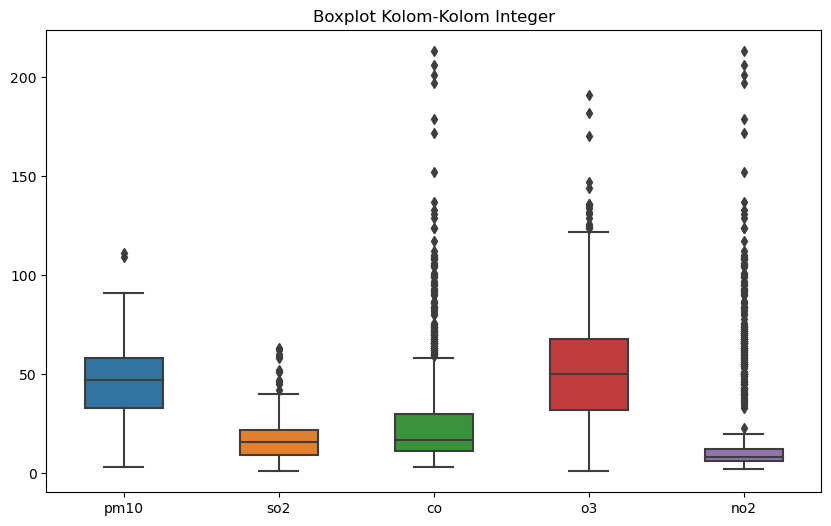

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Menampilkan statistik deskriptif kolom-kolom integer
integer_columns = df.select_dtypes(include='int').columns

# Menghitung IQR untuk setiap kolom
Q1 = df[integer_columns].quantile(0.25)
Q3 = df[integer_columns].quantile(0.75)
IQR = Q3 - Q1

# Mengidentifikasi outlier
outliers = ((df[integer_columns] < (Q1 - 1.5 * IQR)) | (df[integer_columns] > (Q3 + 1.5 * IQR)))

# Menampilkan DataFrame dengan nilai outlier ditandai
df_outliers = df.copy()
df_outliers[integer_columns] = df_outliers[integer_columns].where(~outliers, pd.NA)
print("\nDataFrame dengan Outlier Ditandai:")
print(df_outliers)

# Membuat boxplot dengan seaborn
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[integer_columns], width=0.5)
plt.title('Boxplot Kolom-Kolom Integer')
plt.show()


DataFrame setelah mengatasi outlier:
    pm10 so2  co  o3  no2 categori
0     30  20  10  32    9     BAIK
1     27  22  12  29    8     BAIK
2     39  22  14  32   10     BAIK
3     34  22  14  38   10     BAIK
4     35  22  12  31    9     BAIK
..   ...  ..  ..  ..  ...      ...
905   71  14  23  97   13   SEDANG
906   55  14  11  64    7   SEDANG
907   58  16  10  71    7   SEDANG
908   56  15  10  90   11   SEDANG
909   67  15  16  86   10   SEDANG

[903 rows x 6 columns]


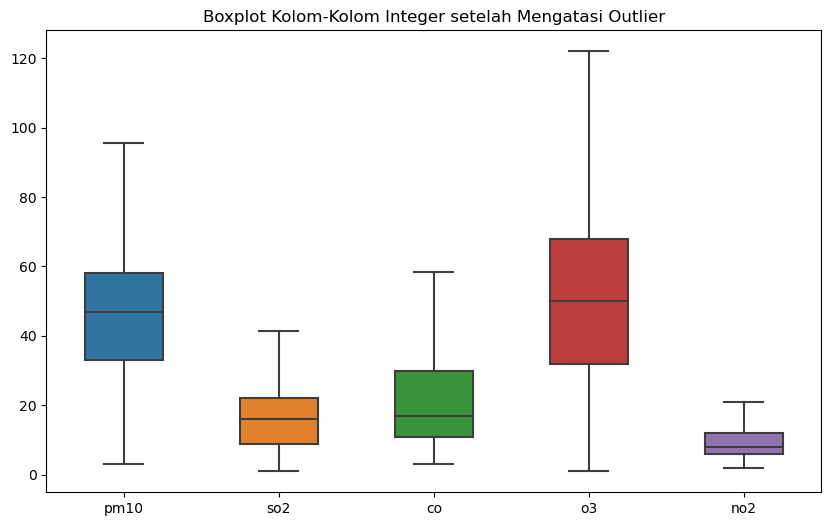

In [11]:
import pandas as pd
import numpy as np
from scipy.stats import iqr
# Menampilkan statistik deskriptif kolom-kolom integer
integer_columns = df.select_dtypes(include='int').columns

# Mengatasi outlier dengan pendekatan robust
def robust_scaling(series):
    Q1 = np.percentile(series, 25)
    Q3 = np.percentile(series, 75)
    IQR = iqr(series)
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return np.clip(series, lower_bound, upper_bound)

df[integer_columns] = df[integer_columns].apply(robust_scaling)

# Menampilkan DataFrame setelah mengatasi outlier
print("\nDataFrame setelah mengatasi outlier:")
print(df)

# Membuat boxplot dengan seaborn setelah pengolahan outlier
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(data=df[integer_columns], width=0.5)
plt.title('Boxplot Kolom-Kolom Integer setelah Mengatasi Outlier')
plt.show()

### UNIQ VALUE

In [12]:
# Melihat nilai unik dalam kolom 'col1'
unique_values = df['categori'].unique()
print("Nilai unik dalam kolom 'categori':", unique_values)

# Jika Anda ingin melihat frekuensi setiap nilai
value_counts = df['categori'].value_counts()
print("\nFrekuensi setiap nilai dalam kolom 'categori':")
print(value_counts)

Nilai unik dalam kolom 'categori': ['BAIK' 'SEDANG' 'TIDAK SEHAT' 'SANGAT TIDAK SEHAT']

Frekuensi setiap nilai dalam kolom 'categori':
SEDANG                607
BAIK                  232
TIDAK SEHAT            61
SANGAT TIDAK SEHAT      3
Name: categori, dtype: int64


In [13]:
df

,pm10,so2,co,o3,no2,categori
0,30,20,10,32,9,BAIK
1,27,22,12,29,8,BAIK
2,39,22,14,32,10,BAIK
3,34,22,14,38,10,BAIK
4,35,22,12,31,9,BAIK
...,...,...,...,...,...,...
905,71,14,23,97,13,SEDANG
906,55,14,11,64,7,SEDANG
907,58,16,10,71,7,SEDANG
908,56,15,10,90,11,SEDANG


In [14]:
# Encoding kategori
kategori_mapping = {
    'BAIK': 3,
    'SEDANG': 2,
    'TIDAK SEHAT': 1,
    'SANGAT TIDAK SEHAT': 0
}

df['categori_encoded'] = df['categori'].map(kategori_mapping)

# Tampilkan hasil
df

,pm10,so2,co,o3,no2,categori,categori_encoded
0,30,20,10,32,9,BAIK,3
1,27,22,12,29,8,BAIK,3
2,39,22,14,32,10,BAIK,3
3,34,22,14,38,10,BAIK,3
4,35,22,12,31,9,BAIK,3
...,...,...,...,...,...,...,...
905,71,14,23,97,13,SEDANG,2
906,55,14,11,64,7,SEDANG,2
907,58,16,10,71,7,SEDANG,2
908,56,15,10,90,11,SEDANG,2


In [16]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Pilih kolom untuk normalisasi
columns_to_normalize = df.columns.difference(['categori', 'categori_encoded'])

# Inisialisasi objek MinMaxScaler
scaler = MinMaxScaler()

# Normalisasi data menggunakan Min-Max Scaling hanya pada kolom tertentu
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Tampilkan hasil
df

,pm10,so2,co,o3,no2,categori,categori_encoded
0,0.291892,0.469136,0.126126,0.256198,0.368421,BAIK,3
1,0.259459,0.518519,0.162162,0.231405,0.315789,BAIK,3
2,0.389189,0.518519,0.198198,0.256198,0.421053,BAIK,3
3,0.335135,0.518519,0.198198,0.305785,0.421053,BAIK,3
4,0.345946,0.518519,0.162162,0.247934,0.368421,BAIK,3
...,...,...,...,...,...,...,...
905,0.735135,0.320988,0.360360,0.793388,0.578947,SEDANG,2
906,0.562162,0.320988,0.144144,0.520661,0.263158,SEDANG,2
907,0.594595,0.370370,0.126126,0.578512,0.263158,SEDANG,2
908,0.572973,0.345679,0.126126,0.735537,0.473684,SEDANG,2


### KNN

In [25]:
from sklearn.model_selection import train_test_split

# Contoh data dan target
X = df[['pm10', 'so2', 'co', 'o3', 'no2']]
y = df['categori_encoded']

# Pembagian data menjadi set pelatihan dan set pengujian (80% pelatihan, 20% pengujian)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tampilkan ukuran set pelatihan dan set pengujian
print("Jumlah data set pelatihan:", len(X_train))
print("Jumlah data set pengujian:", len(X_test))


Jumlah data set pelatihan: 722
Jumlah data set pengujian: 181


In [24]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Contoh data dan target
X = df[['pm10', 'so2', 'co', 'o3', 'no2']]
y = df['categori_encoded']

# Pilih rentang nilai K yang ingin dicoba
k_values = np.arange(3,5, 7)

# Inisialisasi list untuk menyimpan hasil evaluasi
cross_val_scores = []

# Looping untuk setiap nilai K
for k in k_values:
    # Inisialisasi model KNN dengan nilai K tertentu
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Lakukan cross-validation dengan 5-Fold
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    
    # Catat rata-rata akurasi dari cross-validation
    cross_val_scores.append(np.mean(scores))

# Temukan nilai K terbaik
best_k = k_values[np.argmax(cross_val_scores)]

print("Nilai K terbaik:", best_k)


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:676: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along

Nilai K terbaik: 3


In [27]:
from sklearn.neighbors import KNeighborsClassifier

# Inisialisasi model KNN dengan nilai K terbaik
knn_model = KNeighborsClassifier(n_neighbors=3)

# Latih model pada seluruh set pelatihan
knn_model.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [30]:
y_pred = knn_model.predict(X_test)

C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [31]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Evaluasi kinerja model
accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)
confusion_matrix_result = confusion_matrix(y_test, y_pred)

print("Akurasi:", accuracy)
print("Classification Report:\n", classification_report_result)
print("Confusion Matrix:\n", confusion_matrix_result)


Akurasi: 0.8674033149171271
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.67      0.46      0.55        13
           2       0.91      0.89      0.90       121
           3       0.81      0.93      0.87        46

    accuracy                           0.87       181
   macro avg       0.60      0.57      0.58       181
weighted avg       0.86      0.87      0.86       181

Confusion Matrix:
 [[  0   0   1   0]
 [  0   6   7   0]
 [  0   3 108  10]
 [  0   0   3  43]]


C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Luqna Aziziyah\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
